In [60]:
import numpy as np
import pandas as pd
#import missingno as msno
data_train = pd.read_csv('claim_data_v2_train.csv')
data_train.sample(3)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
4304,IA,Iowa,532.008116,High School or Below,01/15/2019,Employed,F,88669,Urban,Married,...,9,18,Collision,Call Center,Four-Door Car,Midsize,Honda,9470.0,N,5305
4825,MO,Missouri,239.391537,College,01/15/2019,Unemployed,M,0,Suburban,Single,...,24,10,Collision,Branch,Four-Door Car,Midsize,Chevrolet,43879.0,N,5826
2538,MO,Missouri,538.089864,College,12/15/2018,Employed,F,55350,Suburban,Married,...,0,13,Collision,Agent,Four-Door Car,Midsize,Ford,40655.0,N,3539


In [61]:
def visualize_cat(attr, df=data_train):
    df_i = df[['Survived', attr]].groupby([attr])['Survived'].agg(['count','sum', 'mean'])
    m = 'Pct Survived'
    df_i = df_i.rename({'count': 'frequency', 'sum': 'Survivers', 'mean': m}, axis='columns')
    print(df_i)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    df_i['frequency'].plot.bar(ax=ax1, alpha=.8)
    df_i[m].plot.line(ax=ax2, color='k')
    ax1.set_ylabel('frequency')
    ax2.set_ylabel('Pct Survived')
    ax2.set_ylim(bottom=0, top=1, auto=False)
    ax2.legend()

In [62]:
data_train["Fraudulent_Claim"].describe()

count     5001
unique       2
top          N
freq      4694
Name: Fraudulent_Claim, dtype: object

In [63]:
data_train.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

In [64]:
data_train.describe(include='all')

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
count,5001,5001,5001.000000,4990,5001,5001,5001,5.001000e+03,4998,5001,...,5001.000000,5001.000000,5001,5001,5001,5001,5001,4992.000000,5001,5001.000000
unique,5,5,NaN,5,3,5,2,NaN,3,3,...,NaN,NaN,5,4,6,3,4,NaN,2,NaN
top,IA,Iowa,NaN,College,12/01/2018,Employed,M,NaN,Suburban,Married,...,NaN,NaN,Collision,Agent,Four-Door Car,Midsize,Toyota,NaN,N,NaN
freq,1546,1546,NaN,1492,2000,3126,2531,NaN,3156,2930,...,NaN,NaN,2077,1889,2535,3523,1278,NaN,4694,NaN
mean,NaN,NaN,787.763253,NaN,NaN,NaN,NaN,4.131045e+04,NaN,NaN,...,15.004199,48.234953,NaN,NaN,NaN,NaN,NaN,23728.152644,NaN,3501.000000
std,NaN,NaN,655.963269,NaN,NaN,NaN,NaN,2.276904e+05,NaN,NaN,...,11.139649,28.096651,NaN,NaN,NaN,NaN,NaN,13827.401917,NaN,1443.808678
min,NaN,NaN,189.868369,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1001.000000
25%,NaN,NaN,402.296353,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,5.000000,24.000000,NaN,NaN,NaN,NaN,NaN,11528.750000,NaN,2251.000000
50%,NaN,NaN,577.390039,NaN,NaN,NaN,NaN,3.464000e+04,NaN,NaN,...,13.000000,48.000000,NaN,NaN,NaN,NaN,NaN,23993.500000,NaN,3501.000000
75%,NaN,NaN,886.114954,NaN,NaN,NaN,NaN,6.300900e+04,NaN,NaN,...,23.000000,72.000000,NaN,NaN,NaN,NaN,NaN,35574.000000,NaN,4751.000000


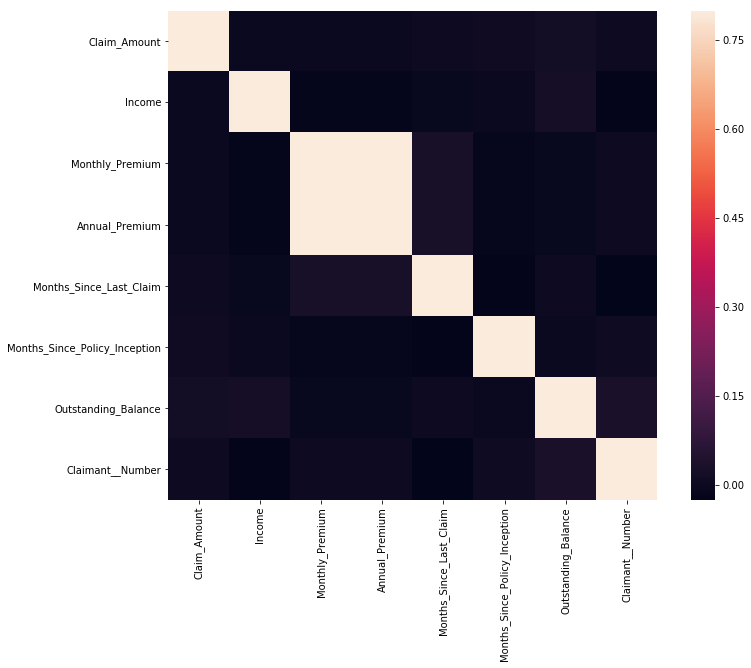

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat= data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Heat map using cufflinks library

Cufflinks is an extention of plotly that makes it more compatable with pandas dataframes

In [67]:
import cufflinks as cf
import plotly
plotly.tools.set_credentials_file(username='cd412', api_key='kOyvGEmesjT6yen20LcW')

In [126]:
def make_heatmap(a, b, agg='count', colorscale='Greys'):
    """Make heatmap from two categorical variables"""
    df = data_train[[a, b, 'Fraudulent_Claim']].copy(deep=True)
    df['Fraudulent_Claim'] = df['Fraudulent_Claim'].replace(('Y', 'N'), (1, 0))
    ct = pd.crosstab(df[a], df[b], values=df['Fraudulent_Claim'], aggfunc=agg)
    df_hm = pd.DataFrame(data=ct.values, index=ct.index.astype('str'), columns=ct.columns)
    print(df_hm)
    return df_hm.iplot(kind='heatmap', colorscale=colorscale)

In [127]:
make_heatmap('State', 'Education', 'mean', 'Reds') 

Education  Bachelor   College    Doctor  High School or Below    Master
State                                                                  
Iowa       0.069620  0.058947  0.069444              0.073892  0.051282
Kansas     0.070866  0.076336  0.000000              0.078014  0.111111
Missouri   0.056306  0.049550  0.078431              0.047382  0.049505
Nebraska   0.056291  0.074830  0.022222              0.060811  0.108434
Oklahoma   0.048611  0.040541  0.105263              0.055901  0.081633


In [128]:
make_heatmap('State', 'Education') 

Education  Bachelor  College  Doctor  High School or Below  Master
State                                                             
Iowa            474      475      72                   406     117
Kansas          127      131      20                   141      45
Missouri        444      444      51                   401     101
Nebraska        302      294      45                   296      83
Oklahoma        144      148      19                   161      49


In [129]:
make_heatmap('Vehicle_Size', 'Vehicle_Model')

Vehicle_Model  Chevrolet  Ford  Honda  Toyota
Vehicle_Size                                 
Compact              225   259    244     237
Luxury               148   121    116     128
Midsize              894   885    831     913


In [ ]:
#potential log tranformation
data_train['Claim_Amount'].hist()

In [ ]:
data_train['Income'].describe()
data_train['Income'].hist()

In [ ]:
data=data_train['Income'].where(data_train['Income']<=100000,other=100001)
data.hist()

In [ ]:
data_train['Annual_Premium'].hist()

In [ ]:
data_train['Monthly_Premium'].hist()

In [ ]:
data_train['Months_Since_Last_Claim'].hist()

In [ ]:
data_train['Months_Since_Policy_Inception'].hist()

In [ ]:
data_train['Outstanding_Balance'].hist()

In [ ]:
data_train.isna().sum()

In [ ]:
sns.catplot(x="Fraudulent_Claim", y="Claim_Amount", kind="violin",data=data_train);

In [ ]:
sns.catplot(x="Gender", y="Claim_Amount", kind="violin", 
            split=True, hue="Fraudulent_Claim", data=data_train, inner=None, cut=0, palette={"Y":"r", "N":"w"}, scale="width");

In [ ]:
sns.catplot(x="Fraudulent_Claim", y="Income", kind="violin",data=data_train);